In [1]:
import torch
from torch import optim, nn

from model import Net, train, test
from utils import prepare_mnist_data,\
     summary_printer, plot_img_batch, plot_loss_n_acc

In [2]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

## Data preparation

In [3]:
train_loader, test_loader = prepare_mnist_data()

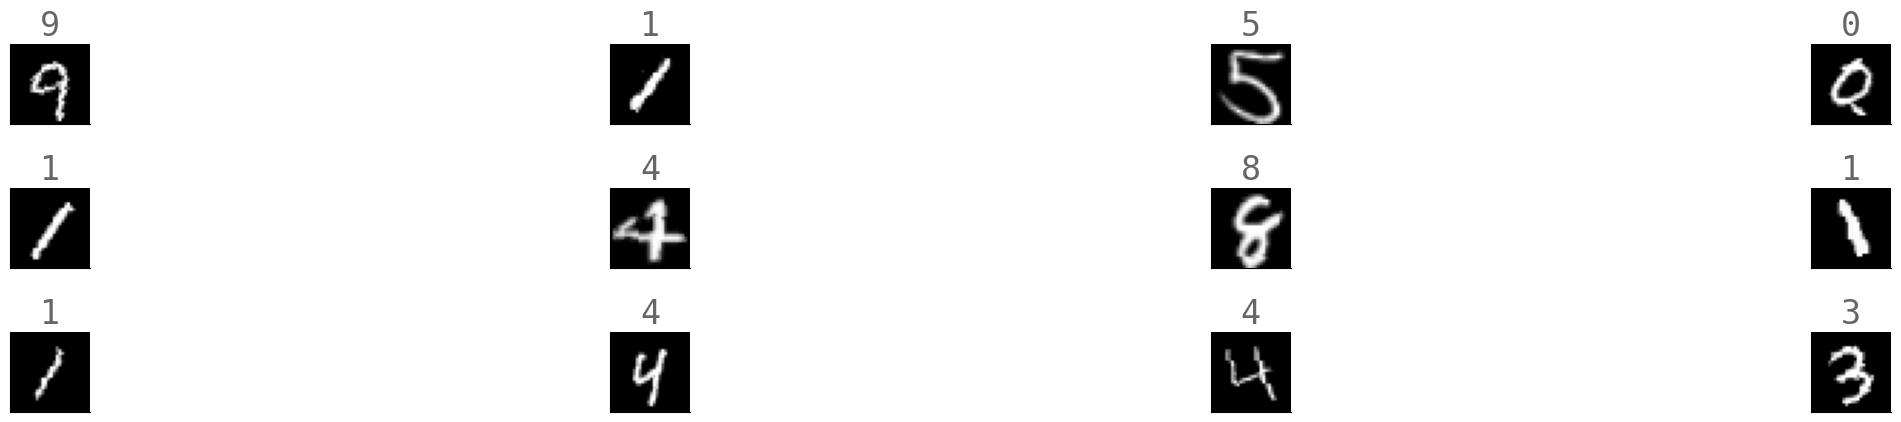

In [4]:
_ = plot_img_batch(train_loader)

## Modelling

In [6]:
model = Net().to(device)
optimizer = optim.SGD(
    model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(
    optimizer, step_size=15, gamma=0.1, verbose=True)
criterion = nn.CrossEntropyLoss(reduce='sum')
num_epochs = 20

# train and test make up as methods of net
train_losses = []
train_acc = []
test_acc = []
test_losses = []
for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    acc, loss = train(model, device, train_loader, optimizer, criterion)
    train_acc.append(acc)
    train_losses.append(loss)
    test(model, device, train_loader, criterion)
    test_acc.append(acc)
    test_losses.append(loss)
    scheduler.step()

/opt/homebrew/Caskroom/miniforge/base/envs/minitorch/lib/python3.10/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.3914             Batch_id=117 Accuracy=50.56: 100%|██████████| 118/118 [01:16<00:00,  1.54it/s]


Test set: Average loss: 0.0007,          Accuracy: 53834/60000 (89.72%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1208             Batch_id=117 Accuracy=93.66: 100%|██████████| 118/118 [01:16<00:00,  1.54it/s]


Test set: Average loss: 0.0003,          Accuracy: 57262/60000 (95.44%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0680             Batch_id=117 Accuracy=96.26: 100%|██████████| 118/118 [01:17<00:00,  1.53it/s]


Test set: Average loss: 0.0002,          Accuracy: 58130/60000 (96.88%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0775             Batch_id=117 Accuracy=97.17: 100%|██████████| 118/118 [01:17<00:00,  1.52it/s]


Test set: Average loss: 0.0002,          Accuracy: 58475/60000 (97.46%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0898             Batch_id=117 Accuracy=97.61: 100%|██████████| 118/118 [01:17<00:00,  1.53it/s]


Test set: Average loss: 0.0001,          Accuracy: 58744/60000 (97.91%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0094             Batch_id=117 Accuracy=97.87: 100%|██████████| 118/118 [01:17<00:00,  1.53it/s]


Test set: Average loss: 0.0001,          Accuracy: 58767/60000 (97.94%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0102             Batch_id=117 Accuracy=98.05: 100%|██████████| 118/118 [01:16<00:00,  1.53it/s]


Test set: Average loss: 0.0001,          Accuracy: 58904/60000 (98.17%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.1119             Batch_id=117 Accuracy=98.29: 100%|██████████| 118/118 [01:17<00:00,  1.52it/s]


Test set: Average loss: 0.0001,          Accuracy: 58899/60000 (98.17%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0309             Batch_id=117 Accuracy=98.30: 100%|██████████| 118/118 [01:17<00:00,  1.52it/s]


Test set: Average loss: 0.0001,          Accuracy: 59001/60000 (98.33%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0140             Batch_id=117 Accuracy=98.46: 100%|██████████| 118/118 [01:17<00:00,  1.53it/s]


Test set: Average loss: 0.0001,          Accuracy: 59180/60000 (98.63%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0412             Batch_id=32 Accuracy=98.61:  28%|██▊       | 33/118 [00:22<00:55,  1.54it/s]

In [ ]:
plot_loss_n_acc(train_loader, train_acc, test_loader, test_acc)